# Análise de sentimentos do Twitter com dados extraidor do dataset anotado tweetSentBR

O trabalho será realizando apenas com os dados balanaceados (oversampling)

### Importando bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Carregando os dados para treinamento do modelo

In [2]:
# carregando dataset
tweets_df = pd.read_csv('')

In [3]:
tweets_df.head()

,id,hashtag,votes,hard,sentiment,group,text,repeat
0,863044774588272640,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,1,test,que coisa linda O programa estava mostrando um...,False
1,865583716088766464,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,1,test,por mais com as irmãs galvão adorei elas,False
2,865063232201011200,#TheNoite,"[1, 0, 1, 1, 1, 0, 0]",2,1,test,mr CATRA USERNAME lançando sua nova música PPK...,False
3,864668391008763904,#masterchefbr,"[0, 0, 0, 0, 0, 0, 0]",0,0,test,quem viu aquela lutadora modela barbuda tatuad...,False
4,865572794016378880,#encontro,"[-1, -1, -1, -1, -1, -1, -1]",0,-1,test,tô passada com esse cara quanta merda pode sai...,False


In [4]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15047 entries, 0 to 15046
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         15047 non-null  int64 
 1   hashtag    15047 non-null  object
 2   votes      15047 non-null  object
 3   hard       15047 non-null  int64 
 4   sentiment  15047 non-null  object
 5   group      15047 non-null  object
 6   text       15047 non-null  object
 7   repeat     15047 non-null  bool  
dtypes: bool(1), int64(2), object(5)
memory usage: 837.7+ KB


In [5]:
tweets_df.groupby(['sentiment']).count()

,id,hashtag,votes,hard,group,text,repeat
sentiment,,,,,,,
-,47,47,47,47,47,47,47
-1,4426,4426,4426,4426,4426,4426,4426
0,3926,3926,3926,3926,3926,3926,3926
1,6648,6648,6648,6648,6648,6648,6648


Como podemos observar, os dados estão desbalanceados e com algumas linhas apresentando a variável sentimento com o caracter traço '-'.

Para melhor trabalharmos com os dados, foi decidida a remoção dessas linhas.

In [6]:
# removendo as linhas com a variável sentimento como traço '-'

indexNames = tweets_df[ tweets_df['sentiment'] == '-' ].index #obtendo o valor para ajudar a remover a linha
tweets_df.drop(indexNames , inplace=True) #removendo a linha correspondente ao valor informado

In [7]:
# tranformando valores para adequar a os classificadores
tweets_df['sentiment'] = tweets_df['sentiment'].replace(['-1', '0', '1'], [3, 6, 9])
tweets_df['sentiment'] = tweets_df['sentiment'].replace([3, 6, 9], [0, 1, 2])

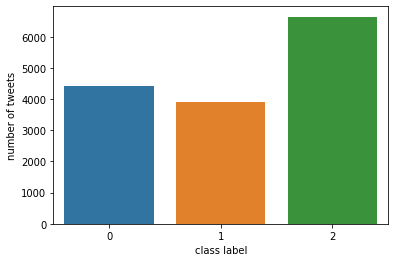

In [8]:
# Visualizando os dados graficamente
sns.countplot(x=tweets_df.sentiment)
plt.xlabel('class label')
plt.ylabel('number of tweets')
plt.show()

In [9]:
tweets_df.groupby(['sentiment']).count()

,id,hashtag,votes,hard,group,text,repeat
sentiment,,,,,,,
0,4426,4426,4426,4426,4426,4426,4426
1,3926,3926,3926,3926,3926,3926,3926
2,6648,6648,6648,6648,6648,6648,6648


## Efetuando a limpeza dos dados

In [10]:
# removendo as palavras USERNAME e NUMBER
tweets_df['text_clean'] = tweets_df['text'].str.replace('USERNAME', '').str.replace('NUMBER', '')

In [11]:
!python -m nltk.downloader stopwords

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# importando a biblioteca de processamento de linguagen natural e a de expreções regulares (regex)
import nltk
import re

# usando as funções stopword e remover os caracteres indesejados
def Preprocessing(instancia):
    instancia = re.sub(r"http\S+", "", instancia).lower() # remove url e tranforma o texto em minusculo
    instancia = re.sub(r'[0-9]+', '', instancia) # remove números
    instancia = re.sub(r'[^\w\s]','', instancia) # remove pontuação
    instancia = re.sub('[!#$%^&*()]', '', instancia) #remove caractéres espaciais
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [13]:
# remover emojis utilizado regex (re)
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [14]:
# aplicando a função de limpeza de dados:
tweets_df['text_clean'] = [Preprocessing(i) for i in tweets_df['text_clean']]
tweets_df['text_clean'] = [remove_emoji(i) for i in tweets_df['text_clean']]
pd.set_option('display.max_colwidth', None) 

tweets_df.head()

,id,hashtag,votes,hard,sentiment,group,text,repeat,text_clean
0,863044774588272640,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,2,test,que coisa linda O programa estava mostrando uma familia que adotou um adolescente de NUMBER anos que amor !,False,coisa linda programa mostrando familia adotou adolescente anos amor
1,865583716088766464,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,2,test,por mais com as irmãs galvão adorei elas,False,irmãs galvão adorei
2,865063232201011200,#TheNoite,"[1, 0, 1, 1, 1, 0, 0]",2,2,test,mr CATRA USERNAME lançando sua nova música PPK CHORA no USERNAME k k k 👅 😉 #MrCatra #PpkChora,False,mr catra lançando nova música ppk chora k k k mrcatra ppkchora
3,864668391008763904,#masterchefbr,"[0, 0, 0, 0, 0, 0, 0]",0,1,test,quem viu aquela lutadora modela barbuda tatuada #MasterChefBR,False,viu lutadora modela barbuda tatuada masterchefbr
4,865572794016378880,#encontro,"[-1, -1, -1, -1, -1, -1, -1]",0,0,test,tô passada com esse cara quanta merda pode sair da boca de alguém em alguns minutos 😠,False,tô passada cara quanta merda pode sair boca alguém alguns minutos


# Lematização

In [15]:
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download pt_core_news_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2022-07-13 17:47:32.941658: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 63.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [16]:
import spacy
nlp = spacy.load('pt_core_news_sm')

In [17]:
tweets_df['text_lemma'] = tweets_df['text_clean'].apply(lambda row: " ".join([w.lemma_ for w in nlp(row)]))

In [18]:
tweets_df['text_lemma'] = [Preprocessing(i) for i in tweets_df['text_lemma']]
tweets_df.head()

,id,hashtag,votes,hard,sentiment,group,text,repeat,text_clean,text_lemma
0,863044774588272640,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,2,test,que coisa linda O programa estava mostrando uma familia que adotou um adolescente de NUMBER anos que amor !,False,coisa linda programa mostrando familia adotou adolescente anos amor,coisa lindo programa mostrar familia adotar adolescente ano amor
1,865583716088766464,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,2,test,por mais com as irmãs galvão adorei elas,False,irmãs galvão adorei,irmã galvão ador
2,865063232201011200,#TheNoite,"[1, 0, 1, 1, 1, 0, 0]",2,2,test,mr CATRA USERNAME lançando sua nova música PPK CHORA no USERNAME k k k 👅 😉 #MrCatra #PpkChora,False,mr catra lançando nova música ppk chora k k k mrcatra ppkchora,mr catra lançar novo música ppk chorar k k k mrcatra ppkchora
3,864668391008763904,#masterchefbr,"[0, 0, 0, 0, 0, 0, 0]",0,1,test,quem viu aquela lutadora modela barbuda tatuada #MasterChefBR,False,viu lutadora modela barbuda tatuada masterchefbr,ver lutadora modelar barbuda tatuar masterchefbr
4,865572794016378880,#encontro,"[-1, -1, -1, -1, -1, -1, -1]",0,0,test,tô passada com esse cara quanta merda pode sair da boca de alguém em alguns minutos 😠,False,tô passada cara quanta merda pode sair boca alguém alguns minutos,tô passado cara quanto merdo poder sair boca alguém algum minuto


## Lematização (outra forma)

In [19]:
!pip install simplemma

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
import simplemma
from simplemma import text_lemmatizer

In [21]:
# teste
teste_lemma = text_lemmatizer('Sou o intervalo entre o que desejo ser e os outros me fizeram.', lang='pt')
teste_lemma

['ser',
 'o',
 'intervalo',
 'entre',
 'o',
 'que',
 'desejo',
 'ser',
 'e',
 'o',
 'outro',
 'me',
 'fazer',
 '.']

In [22]:
tweets_df['text_lemma_2'] = [text_lemmatizer(linha, lang='pt') for linha in tweets_df['text_clean']] #lematizando o texto
tweets_df['text_lemma_2'] = [' '.join(palavra) for palavra in tweets_df['text_lemma_2']] #juntando o texto novamente
tweets_df.head()

,id,hashtag,votes,hard,sentiment,group,text,repeat,text_clean,text_lemma,text_lemma_2
0,863044774588272640,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,2,test,que coisa linda O programa estava mostrando uma familia que adotou um adolescente de NUMBER anos que amor !,False,coisa linda programa mostrando familia adotou adolescente anos amor,coisa lindo programa mostrar familia adotar adolescente ano amor,coisar lindar programar mostrar familia adotar adolescente ano amor
1,865583716088766464,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,2,test,por mais com as irmãs galvão adorei elas,False,irmãs galvão adorei,irmã galvão ador,irmão galvão adorar
2,865063232201011200,#TheNoite,"[1, 0, 1, 1, 1, 0, 0]",2,2,test,mr CATRA USERNAME lançando sua nova música PPK CHORA no USERNAME k k k 👅 😉 #MrCatra #PpkChora,False,mr catra lançando nova música ppk chora k k k mrcatra ppkchora,mr catra lançar novo música ppk chorar k k k mrcatra ppkchora,mr catra lançar novo músico ppk chorar k k k mrcatra ppkchora
3,864668391008763904,#masterchefbr,"[0, 0, 0, 0, 0, 0, 0]",0,1,test,quem viu aquela lutadora modela barbuda tatuada #MasterChefBR,False,viu lutadora modela barbuda tatuada masterchefbr,ver lutadora modelar barbuda tatuar masterchefbr,ver lutador modelar barbudo tatuado masterchefbr
4,865572794016378880,#encontro,"[-1, -1, -1, -1, -1, -1, -1]",0,0,test,tô passada com esse cara quanta merda pode sair da boca de alguém em alguns minutos 😠,False,tô passada cara quanta merda pode sair boca alguém alguns minutos,tô passado cara quanto merdo poder sair boca alguém algum minuto,tô passado caro quanto merda poder sair bocar alguém algum minuto


## Trabalhando no equilibrio dos dados

### Iniciando o trabalho de balanceamento dos dados

In [23]:
minoria = tweets_df.loc[tweets_df['sentiment'] == 0]
meio = tweets_df.loc[tweets_df['sentiment'] == 1]
maioria = tweets_df.loc[tweets_df['sentiment'] == 2]

In [24]:
print('Maioria \n{}\n'.format(maioria['sentiment'].count()))
print('Meio \n{}\n'.format(meio['sentiment'].count()))
print('Minoria \n{}'.format(minoria['sentiment'].count()))

Maioria 
6648

Meio 
3926

Minoria 
4426


## Igualar a quantidade de tweets entre positivo, negativo e neutro

#### Oversampling (Criando datasets reorganizados para maioria)

In [25]:
from sklearn.utils import resample

menor_maior = resample(minoria, replace=True, n_samples=len(maioria), random_state=123)
meio_maior = resample(meio, replace=True, n_samples=len(maioria), random_state=123)

In [26]:
print(menor_maior.count(), meio_maior.count(), maioria.count())

id              6648
hashtag         6648
votes           6648
hard            6648
sentiment       6648
group           6648
text            6648
repeat          6648
text_clean      6648
text_lemma      6648
text_lemma_2    6648
dtype: int64 id              6648
hashtag         6648
votes           6648
hard            6648
sentiment       6648
group           6648
text            6648
repeat          6648
text_clean      6648
text_lemma      6648
text_lemma_2    6648
dtype: int64 id              6648
hashtag         6648
votes           6648
hard            6648
sentiment       6648
group           6648
text            6648
repeat          6648
text_clean      6648
text_lemma      6648
text_lemma_2    6648
dtype: int64


In [27]:
# juntando os dataframes
tweets_df_equilibrado_maior = pd.concat([menor_maior, meio_maior, maioria])

# resetando o index
tweets_df_equilibrado_maior = tweets_df_equilibrado_maior.reset_index()

# removendo as colunas Unnamed: 0 e index
tweets_df_equilibrado_maior.drop(columns=['index'], inplace=True)

In [28]:
tweets_df_equilibrado_maior.groupby(['sentiment']).count()

,id,hashtag,votes,hard,group,text,repeat,text_clean,text_lemma,text_lemma_2
sentiment,,,,,,,,,,
0,6648,6648,6648,6648,6648,6648,6648,6648,6648,6648
1,6648,6648,6648,6648,6648,6648,6648,6648,6648,6648
2,6648,6648,6648,6648,6648,6648,6648,6648,6648,6648


# Machine Learning - Utils

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Vetorizadores
from sklearn.feature_extraction.text import TfidfVectorizer

# Classificadores
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_predict

In [30]:
# Tokenização especial para tweets
from nltk.tokenize import TweetTokenizer

tweet_tokenizer = TweetTokenizer()

In [38]:
# função para escolher os pipelines dos modelos a serem treinados
def escolher_pipeline(pipe):
    
    if(pipe == 1):
        modelo_sgd_tfidf = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', SGDClassifier(alpha=0.0001,
                                     loss='modified_huber', 
                                     penalty ='l2'))
        ])
        return modelo_sgd_tfidf
    
    elif(pipe == 2):
        modelo_nb_tfidf = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', MultinomialNB(alpha=0.1))
        ])
        return modelo_nb_tfidf
    
    elif(pipe == 3):
        modelo_rf_tfidf = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', RandomForestClassifier(n_estimators=10))
        ])
        return modelo_rf_tfidf
    
    elif(pipe == 4):
        modelo_knn_tfidf = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', KNeighborsClassifier(metric='euclidean', 
                                            n_neighbors=1, 
                                            weights='uniform'))
        ])
        return modelo_knn_tfidf
    
    elif(pipe == 5):
        modelo_pa_tfidf = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', PassiveAggressiveClassifier(C= 0.03, 
                                                   loss= 'squared_hinge'))
        ])
        return modelo_pa_tfidf
    
    elif(pipe == 6):
        modelo_gb_tfidf = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', GradientBoostingClassifier(criterion='friedman_mse', 
                                                  learning_rate=0.2, 
                                                  max_depth=8, 
                                                  max_features='sqrt', 
                                                  n_estimators=10))
        ])
        return modelo_gb_tfidf
    
    elif(pipe == 7):
        modelo_xgb_tfidf = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', xgb.XGBClassifier(learning_rate=0.5, 
                                         max_depth=4, 
                                         objective='binary=hinge'))
        ])
        return modelo_xgb_tfidf
    
    elif(pipe == 8):
        modelo_mlp_tfidf = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', MLPClassifier(activation='relu', 
                                     alpha=0.05, 
                                     hidden_layer_sizes=(50, 100, 50), 
                                     learning_rate='constant', 
                                     solver='adam'))
        ])
        return modelo_mlp_tfidf
    
    elif(pipe == 9):
        modelo_lr_tfidf = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', LogisticRegression(C= 100.0, 
                                          penalty= 'l2'))
        ])
        return modelo_lr_tfidf
    
    elif(pipe == 10):
        modelo_svc_tfidf = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', SVC(C=10, 
                           gamma=1, 
                           kernel='rbf'))
        ])
        return modelo_svc_tfidf

In [39]:
!pip install confplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import confplot

# função que exibe a matrix de confusão para avalização do modelo
def matriz_confusao(y_test, modelo_predicao):
    
    # imprimir relatório de classificação
    print("Relatório de Classificação:\n", 
            metrics.classification_report(y_test, modelo_predicao))
    
    # imprimir a acurácia do modelo
    print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, modelo_predicao)))
    
    # imprimir a matrix de confusão
    print("Matrix de confusão:\n", pd.crosstab(y_test, modelo_predicao, 
                                                rownames=['Real'], 
                                                colnames=['Predito'], 
                                                margins=True),  '')
    
    # plotar a matrix de confusão
    cm = confusion_matrix(y_target = y_test, 
                            y_predicted = modelo_predicao, binary=False)
    fig, ax = plot_confusion_matrix(conf_mat = cm)
    plt.show()
    print('\n')
    
    # plotar a matrix de confusão (mais completo)
    y_true = y_test
    y_pred = modelo_predicao
    columns = ['negativo', 'neutro', 'positivo']
    confplot.plot_confusion_matrix_from_data(y_true, y_pred, columns)

# Machine Learning - Construindo modelo com dados oversampling

In [41]:
X = tweets_df_equilibrado_maior['text_lemma_2']
y = tweets_df_equilibrado_maior['sentiment']

In [42]:
X.shape, y.shape

((19944,), (19944,))

### Separando dados para o treino e para o teste

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((14958,), (14958,), (4986,), (4986,))

## Modelo 1 (TfidfVectorizer e SGDClassifier)

In [44]:
modelo1_orig = escolher_pipeline(1)
modelo1_orig = modelo1_orig.fit(X_train, y_train)
modelo1_pred_orig = modelo1_orig.predict(X_test)

In [45]:
modelo1_pred_orig

array([2, 0, 2, ..., 0, 0, 2])

### Avaliando o modelo 1

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80      1653
           1       0.72      0.78      0.75      1681
           2       0.79      0.69      0.74      1652

    accuracy                           0.76      4986
   macro avg       0.76      0.76      0.76      4986
weighted avg       0.76      0.76      0.76      4986

Acurácia: 0.7617

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0        1351   181   121  1653
1         189  1306   186  1681
2         190   321  1141  1652
All      1730  1808  1448  4986 


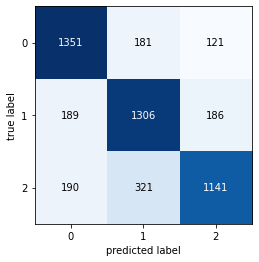

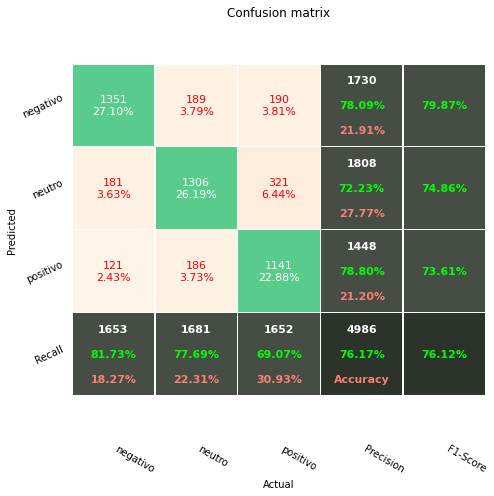

In [47]:
matriz_confusao(y_test, modelo1_pred_orig)

### Validação cruzada - modelo 1

In [48]:
validacao_cruzada1 = cross_val_predict(modelo1_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81      6648
           1       0.73      0.79      0.76      6648
           2       0.80      0.70      0.74      6648

    accuracy                           0.77     19944
   macro avg       0.77      0.77      0.77     19944
weighted avg       0.77      0.77      0.77     19944

Acurácia: 0.7723

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        5530   684   434   6648
1         668  5223   757   6648
2         787  1212  4649   6648
All      6985  7119  5840  19944 


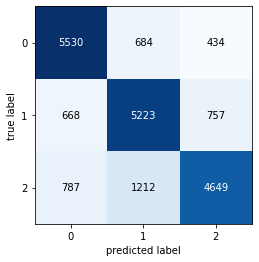

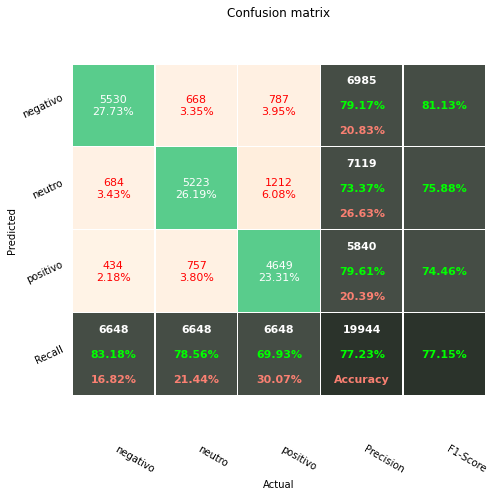

In [49]:
matriz_confusao(y, validacao_cruzada1)

## Modelo 2 (TfidfVectorizer e MultinomialNB)

In [50]:
modelo2_orig = escolher_pipeline(2)
modelo2_orig = modelo2_orig.fit(X_train, y_train)
modelo2_pred_orig = modelo2_orig.predict(X_test)

In [51]:
modelo2_pred_orig

array([2, 0, 1, ..., 0, 0, 2])

### Avaliando o modelo 2

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.72      0.82      0.76      1653
           1       0.74      0.67      0.70      1681
           2       0.74      0.70      0.72      1652

    accuracy                           0.73      4986
   macro avg       0.73      0.73      0.73      4986
weighted avg       0.73      0.73      0.73      4986

Acurácia: 0.7290

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0        1353   152   148  1653
1         286  1132   263  1681
2         248   254  1150  1652
All      1887  1538  1561  4986 


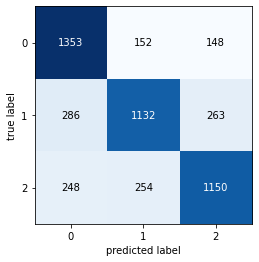

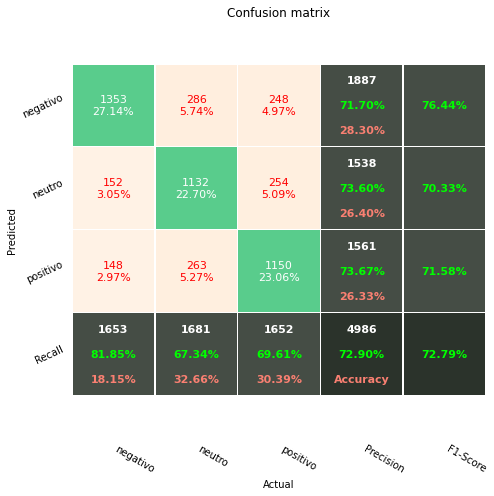

In [52]:
matriz_confusao(y_test, modelo2_pred_orig)

### Validação cruzada - modelo 2

In [53]:
validacao_cruzada2 = cross_val_predict(modelo2_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.73      0.82      0.77      6648
           1       0.73      0.70      0.71      6648
           2       0.75      0.69      0.72      6648

    accuracy                           0.74     19944
   macro avg       0.74      0.74      0.74     19944
weighted avg       0.74      0.74      0.74     19944

Acurácia: 0.7383

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        5476   629   543   6648
1        1056  4629   963   6648
2         975  1054  4619   6648
All      7507  6312  6125  19944 


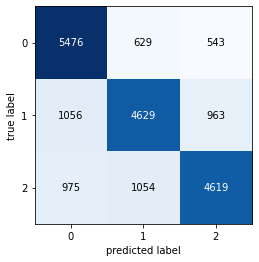

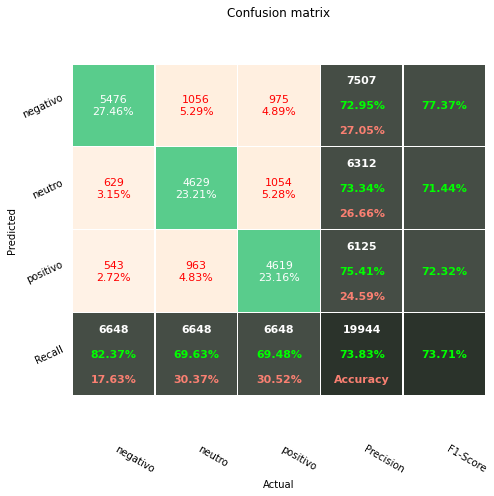

In [54]:
matriz_confusao(y, validacao_cruzada2)

## Modelo 3 (TfidfVectorizer e RandomForestClassifier)

In [55]:
modelo3_orig = escolher_pipeline(3)
modelo3_orig = modelo3_orig.fit(X_train, y_train)
modelo3_pred_orig = modelo3_orig.predict(X_test)

In [56]:
modelo3_pred_orig

array([1, 1, 2, ..., 1, 0, 2])

### Avaliando o modelo 3

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84      1653
           1       0.74      0.85      0.79      1681
           2       0.83      0.64      0.72      1652

    accuracy                           0.79      4986
   macro avg       0.79      0.79      0.78      4986
weighted avg       0.79      0.79      0.78      4986

Acurácia: 0.7862

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0        1444   117    92  1653
1         128  1425   128  1681
2         215   386  1051  1652
All      1787  1928  1271  4986 


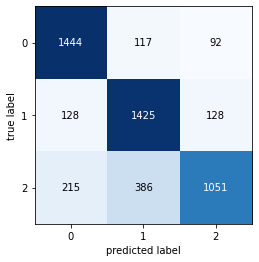

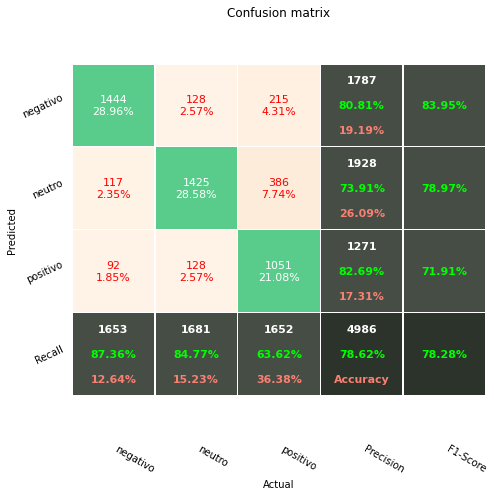

In [57]:
matriz_confusao(y_test, modelo3_pred_orig)

### Validação cruzada - modelo 3

In [58]:
validacao_cruzada3 = cross_val_predict(modelo3_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85      6648
           1       0.76      0.88      0.82      6648
           2       0.85      0.66      0.74      6648

    accuracy                           0.81     19944
   macro avg       0.81      0.81      0.80     19944
weighted avg       0.81      0.81      0.80     19944

Acurácia: 0.8069

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        5842   452   354   6648
1         334  5868   446   6648
2         898  1367  4383   6648
All      7074  7687  5183  19944 


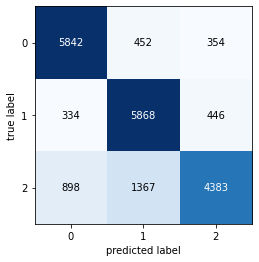

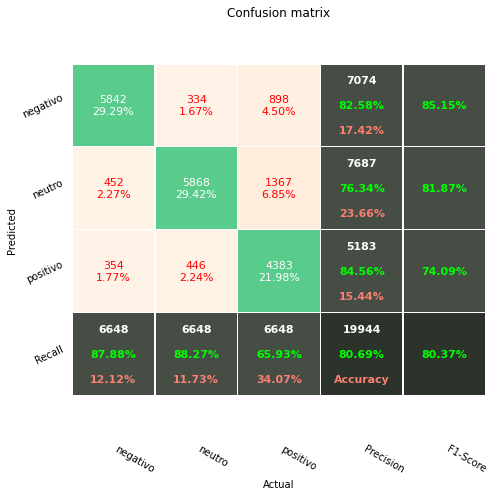

In [59]:
matriz_confusao(y, validacao_cruzada3)

## Modelo 4 (TfidfVectorizer e KNeighborsClassifier)

In [60]:
modelo4_orig = escolher_pipeline(4)
modelo4_orig = modelo4_orig.fit(X_train, y_train)
modelo4_pred_orig = modelo4_orig.predict(X_test)

In [61]:
modelo4_pred_orig

array([1, 1, 1, ..., 1, 0, 1])

### Avaliando o modelo 4

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.90      0.75      0.82      1653
           1       0.54      0.91      0.68      1681
           2       0.81      0.37      0.51      1652

    accuracy                           0.68      4986
   macro avg       0.75      0.68      0.67      4986
weighted avg       0.75      0.68      0.67      4986

Acurácia: 0.6811

Matrix de confusão:
 Predito     0     1    2   All
Real                          
0        1242   361   50  1653
1          52  1535   94  1681
2          83   950  619  1652
All      1377  2846  763  4986 


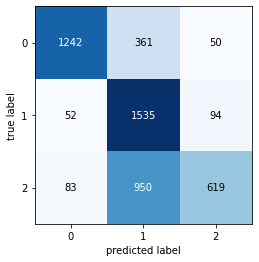

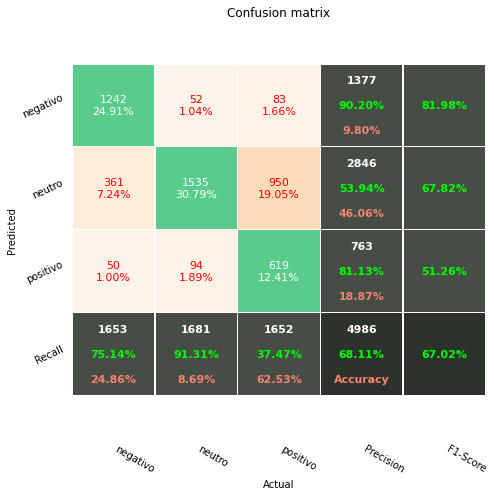

In [62]:
matriz_confusao(y_test, modelo4_pred_orig)

### Validação cruzada - modelo 4

In [63]:
validacao_cruzada4 = cross_val_predict(modelo4_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.60      0.94      0.73      6648
           1       0.85      0.82      0.83      6648
           2       0.86      0.39      0.54      6648

    accuracy                           0.72     19944
   macro avg       0.77      0.72      0.70     19944
weighted avg       0.77      0.72      0.70     19944

Acurácia: 0.7183

Matrix de confusão:
 Predito      0     1     2    All
Real                             
0         6275   170   203   6648
1          982  5429   237   6648
2         3221   805  2622   6648
All      10478  6404  3062  19944 


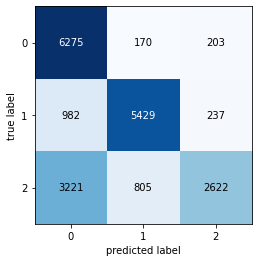

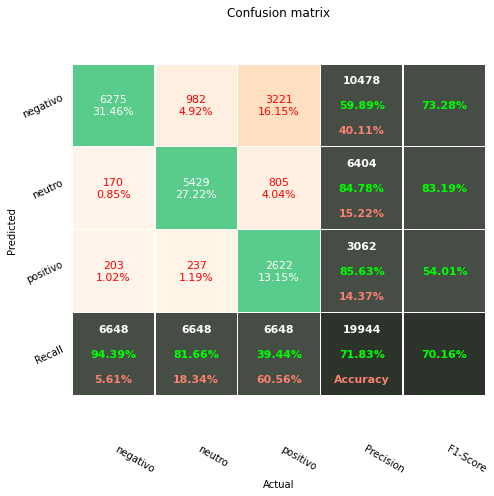

In [64]:
matriz_confusao(y, validacao_cruzada4)

## Modelo 5 (TfidfVectorizer e PassiveAggressiveClassifier)

In [65]:
modelo5_orig = escolher_pipeline(5)
modelo5_orig = modelo5_orig.fit(X_train, y_train)
modelo5_pred_orig = modelo5_orig.predict(X_test)

In [66]:
modelo5_pred_orig

array([2, 1, 2, ..., 0, 0, 2])

### Avaliando o modelo 5

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81      1653
           1       0.74      0.81      0.77      1681
           2       0.79      0.68      0.73      1652

    accuracy                           0.77      4986
   macro avg       0.77      0.77      0.77      4986
weighted avg       0.77      0.77      0.77      4986

Acurácia: 0.7726

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0        1372   164   117  1653
1         141  1359   181  1681
2         208   323  1121  1652
All      1721  1846  1419  4986 


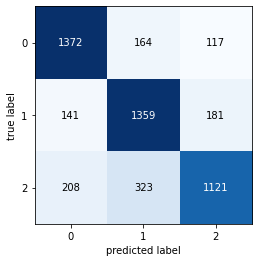

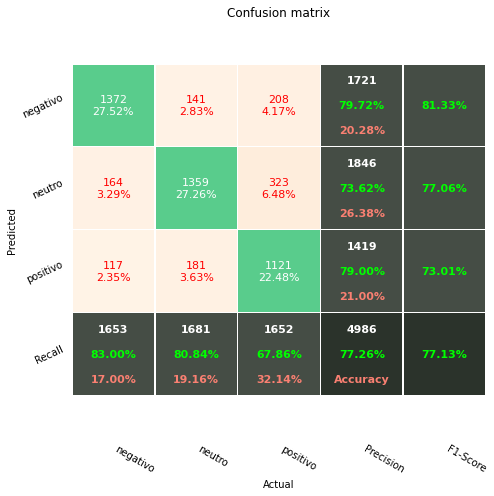

In [67]:
matriz_confusao(y_test, modelo5_pred_orig)

### Validação cruzada - modelo 5

In [68]:
validacao_cruzada5 = cross_val_predict(modelo5_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.81      0.84      0.83      6648
           1       0.75      0.82      0.78      6648
           2       0.80      0.69      0.74      6648

    accuracy                           0.79     19944
   macro avg       0.79      0.79      0.79     19944
weighted avg       0.79      0.79      0.79     19944

Acurácia: 0.7863

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        5611   587   450   6648
1         504  5454   690   6648
2         790  1241  4617   6648
All      6905  7282  5757  19944 


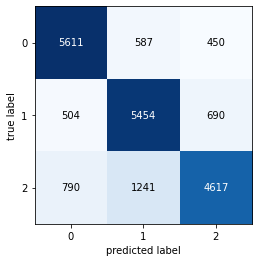

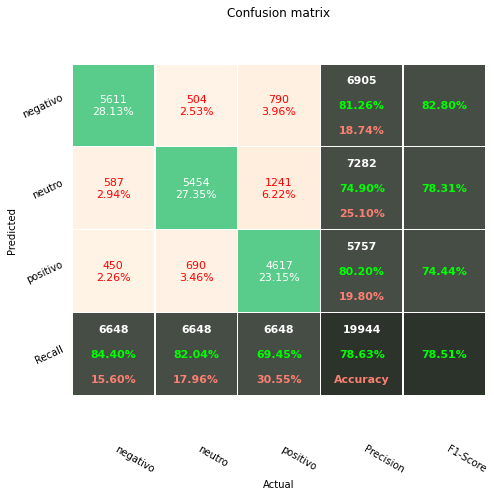

In [69]:
matriz_confusao(y, validacao_cruzada5)

## Modelo 6 (TfidfVectorizer e GradientBoostingClassifier)

In [70]:
modelo6_orig = escolher_pipeline(6)
modelo6_orig = modelo6_orig.fit(X_train, y_train)
modelo6_pred_orig = modelo6_orig.predict(X_test)

In [71]:
modelo6_pred_orig

array([2, 2, 2, ..., 2, 0, 2])

### Avaliando o modelo 6

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.64      0.41      0.50      1653
           1       0.53      0.35      0.42      1681
           2       0.46      0.79      0.58      1652

    accuracy                           0.52      4986
   macro avg       0.54      0.52      0.50      4986
weighted avg       0.54      0.52      0.50      4986

Acurácia: 0.5166

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0         681   332   640  1653
1         229   596   856  1681
2         151   202  1299  1652
All      1061  1130  2795  4986 


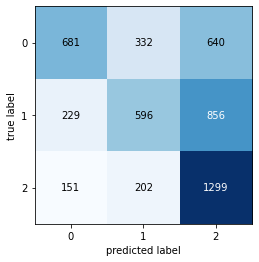

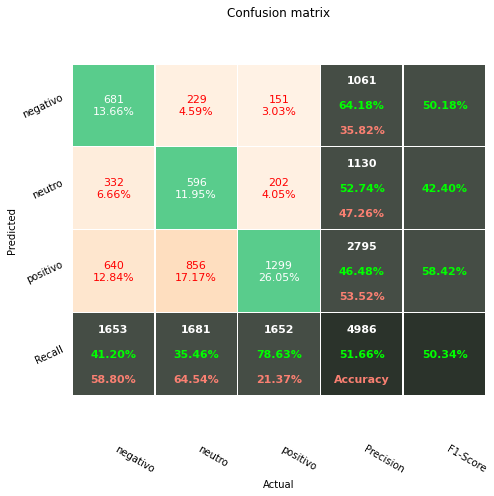

In [72]:
matriz_confusao(y_test, modelo6_pred_orig)

### Validação cruzada - modelo 6

In [73]:
validacao_cruzada6 = cross_val_predict(modelo6_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.63      0.47      0.54      6648
           1       0.47      0.71      0.56      6648
           2       0.64      0.47      0.54      6648

    accuracy                           0.55     19944
   macro avg       0.58      0.55      0.55     19944
weighted avg       0.58      0.55      0.55     19944

Acurácia: 0.5495

Matrix de confusão:
 Predito     0      1     2    All
Real                             
0        3146   2667   835   6648
1        1062   4706   880   6648
2         817   2724  3107   6648
All      5025  10097  4822  19944 


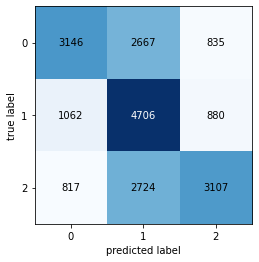

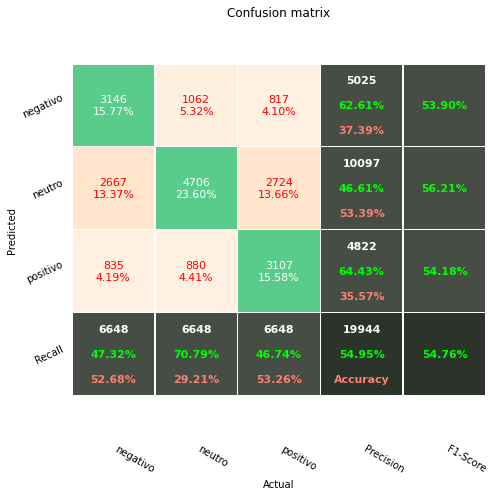

In [74]:
matriz_confusao(y, validacao_cruzada6)

## Modelo 7 (TfidfVectorizer e XGBClassifier)

In [75]:
modelo7_orig = escolher_pipeline(7)
modelo7_orig = modelo7_orig.fit(X_train, y_train)
modelo7_pred_orig = modelo7_orig.predict(X_test)

In [76]:
modelo7_pred_orig

array([2, 1, 2, ..., 1, 0, 2])

### Avaliando o modelo 7

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.75      0.66      0.70      1653
           1       0.59      0.80      0.68      1681
           2       0.78      0.58      0.66      1652

    accuracy                           0.68      4986
   macro avg       0.70      0.68      0.68      4986
weighted avg       0.70      0.68      0.68      4986

Acurácia: 0.6817

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0        1090   422   141  1653
1         196  1349   136  1681
2         171   521   960  1652
All      1457  2292  1237  4986 


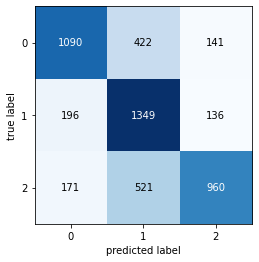

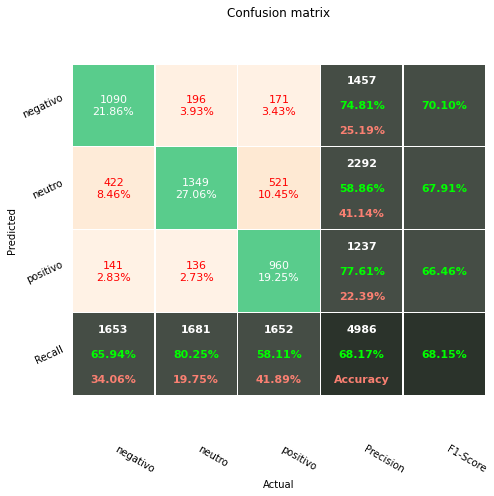

In [77]:
matriz_confusao(y_test, modelo7_pred_orig)

### Validação cruzada - modelo 7

In [78]:
validacao_cruzada7 = cross_val_predict(modelo7_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.75      0.67      0.71      6648
           1       0.60      0.81      0.69      6648
           2       0.79      0.60      0.68      6648

    accuracy                           0.69     19944
   macro avg       0.71      0.69      0.69     19944
weighted avg       0.71      0.69      0.69     19944

Acurácia: 0.6908

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        4455  1678   515   6648
1         729  5365   554   6648
2         741  1950  3957   6648
All      5925  8993  5026  19944 


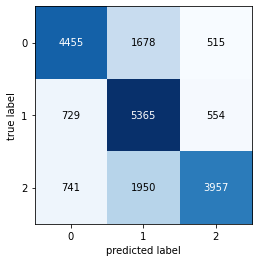

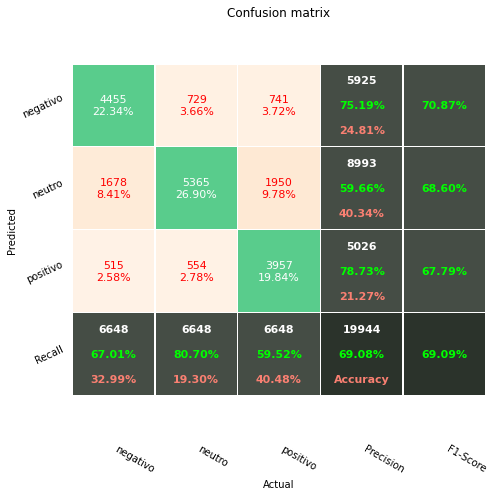

In [79]:
matriz_confusao(y, validacao_cruzada7)

## Modelo 8 (TfidfVectorizer e MLPClassifier)

In [80]:
modelo8_orig = escolher_pipeline(8)
modelo8_orig = modelo8_orig.fit(X_train, y_train)
modelo8_pred_orig = modelo8_orig.predict(X_test)

In [81]:
modelo8_pred_orig

array([2, 1, 2, ..., 0, 0, 1])

### Avaliando o modelo 8

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84      1653
           1       0.77      0.84      0.80      1681
           2       0.81      0.71      0.75      1652

    accuracy                           0.80      4986
   macro avg       0.80      0.80      0.80      4986
weighted avg       0.80      0.80      0.80      4986

Acurácia: 0.7980

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0        1409   129   115  1653
1         113  1405   163  1681
2         188   299  1165  1652
All      1710  1833  1443  4986 


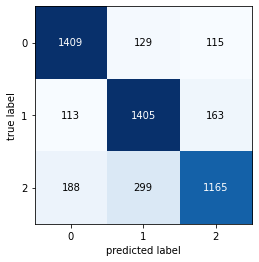

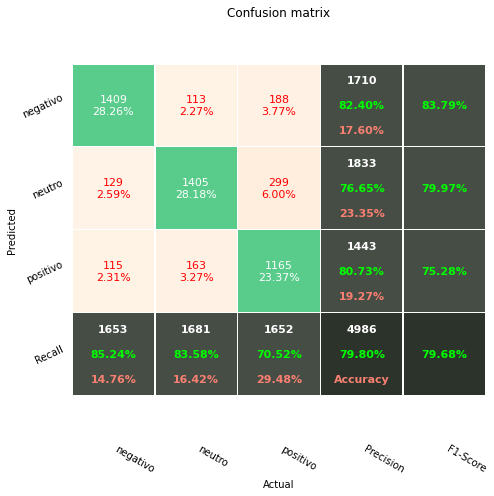

In [82]:
matriz_confusao(y_test, modelo8_pred_orig)

### Validação cruzada - modelo 8

In [83]:
validacao_cruzada8 = cross_val_predict(modelo8_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      6648
           1       0.79      0.87      0.83      6648
           2       0.84      0.73      0.78      6648

    accuracy                           0.83     19944
   macro avg       0.83      0.83      0.83     19944
weighted avg       0.83      0.83      0.83     19944

Acurácia: 0.8265

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        5835   396   417   6648
1         297  5814   537   6648
2         655  1158  4835   6648
All      6787  7368  5789  19944 


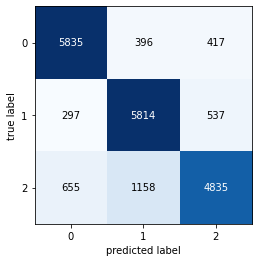

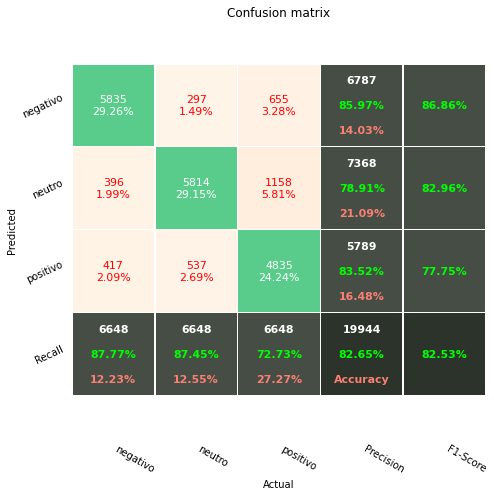

In [84]:
matriz_confusao(y, validacao_cruzada8)

## Modelo 9 (TfidfVectorizer e LogisticRegression)

In [85]:
modelo9_orig = escolher_pipeline(9)
modelo9_orig = modelo9_orig.fit(X_train, y_train)
modelo9_pred_orig = modelo9_orig.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [86]:
modelo9_pred_orig

array([2, 1, 2, ..., 0, 0, 2])

### Avaliando o modelo 9

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1653
           1       0.73      0.81      0.77      1681
           2       0.80      0.68      0.74      1652

    accuracy                           0.78      4986
   macro avg       0.78      0.78      0.77      4986
weighted avg       0.78      0.78      0.77      4986

Acurácia: 0.7760

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0        1377   165   111  1653
1         140  1361   180  1681
2         187   334  1131  1652
All      1704  1860  1422  4986 


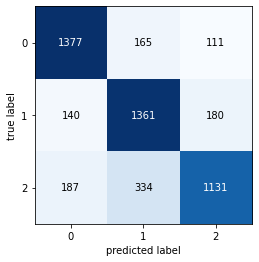

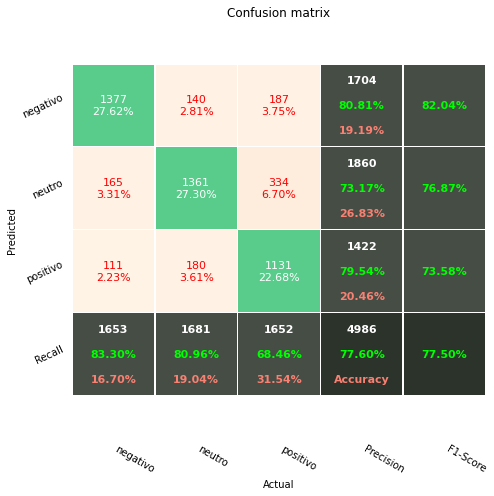

In [87]:
matriz_confusao(y_test, modelo9_pred_orig)

### Validação cruzada - modelo 9

In [88]:
validacao_cruzada9 = cross_val_predict(modelo9_orig, X, y, cv=10)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83      6648
           1       0.75      0.82      0.78      6648
           2       0.81      0.70      0.75      6648

    accuracy                           0.79     19944
   macro avg       0.79      0.79      0.79     19944
weighted avg       0.79      0.79      0.79     19944

Acurácia: 0.7901

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        5632   595   421   6648
1         490  5464   694   6648
2         731  1255  4662   6648
All      6853  7314  5777  19944 


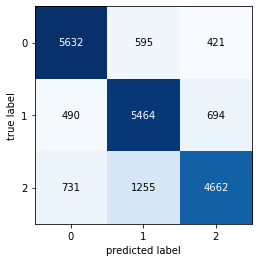

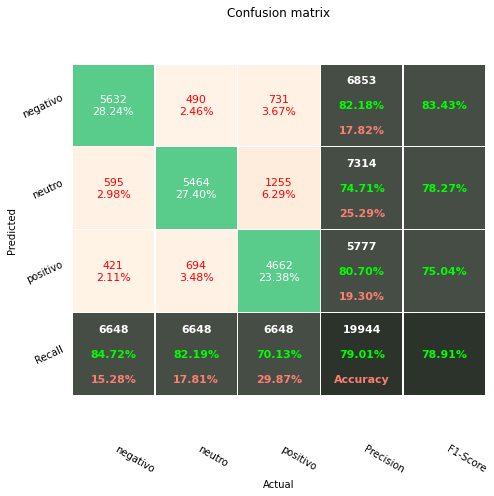

In [89]:
matriz_confusao(y, validacao_cruzada9)

## Modelo 10 (TfidfVectorizer e SVC)

In [90]:
modelo10_orig = escolher_pipeline(10)
modelo10_orig = modelo10_orig.fit(X_train, y_train)
modelo10_pred_orig = modelo10_orig.predict(X_test)

In [91]:
modelo10_pred_orig

array([2, 1, 2, ..., 0, 0, 2])

### Avaliando o modelo 10

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      1653
           1       0.80      0.85      0.82      1681
           2       0.83      0.76      0.79      1652

    accuracy                           0.83      4986
   macro avg       0.83      0.83      0.83      4986
weighted avg       0.83      0.83      0.83      4986

Acurácia: 0.8269

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0        1450   107    96  1653
1         102  1421   158  1681
2         142   258  1252  1652
All      1694  1786  1506  4986 


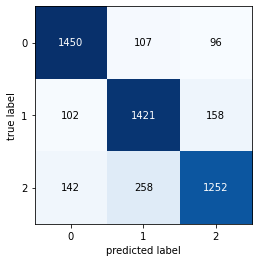

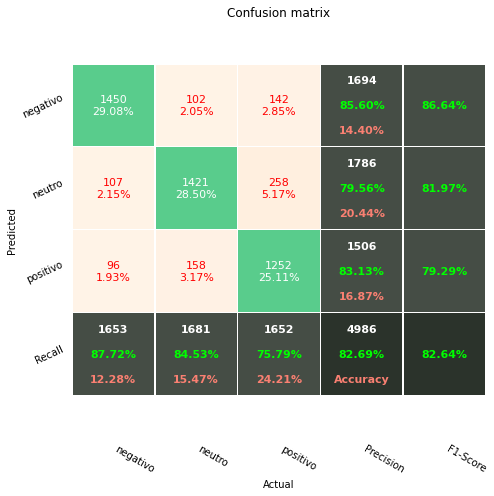

In [92]:
matriz_confusao(y_test, modelo10_pred_orig)

### Validação cruzada - modelo 10

In [93]:
validacao_cruzada10 = cross_val_predict(modelo10_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      6648
           1       0.83      0.87      0.85      6648
           2       0.85      0.79      0.82      6648

    accuracy                           0.85     19944
   macro avg       0.85      0.85      0.85     19944
weighted avg       0.85      0.85      0.85     19944

Acurácia: 0.8506

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        5922   346   380   6648
1         290  5816   542   6648
2         571   851  5226   6648
All      6783  7013  6148  19944 


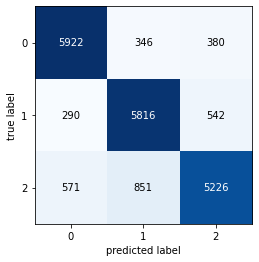

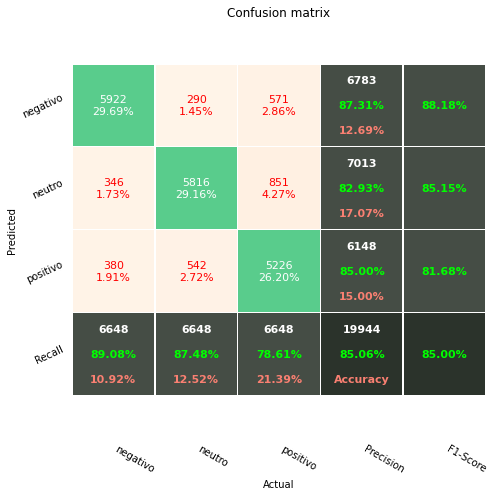

In [94]:
matriz_confusao(y, validacao_cruzada10)

## Gerando relatório dos modelos

In [95]:
# pegando o relatório de metricas dos modelos
report1 = metrics.classification_report(y_test, modelo1_pred_orig, output_dict=True)
report2 = metrics.classification_report(y_test, modelo2_pred_orig, output_dict=True)
report3 = metrics.classification_report(y_test, modelo3_pred_orig, output_dict=True)
report4 = metrics.classification_report(y_test, modelo4_pred_orig, output_dict=True)
report5 = metrics.classification_report(y_test, modelo5_pred_orig, output_dict=True)
report6 = metrics.classification_report(y_test, modelo6_pred_orig, output_dict=True)
report7 = metrics.classification_report(y_test, modelo7_pred_orig, output_dict=True)
report8 = metrics.classification_report(y_test, modelo8_pred_orig, output_dict=True)
report9 = metrics.classification_report(y_test, modelo9_pred_orig, output_dict=True)
report10 = metrics.classification_report(y_test, modelo10_pred_orig, output_dict=True)

In [96]:
# criando o dataframe para o relatório consolidado
columns = ['modelo', 'prec_neg', 'prec_neu', 'prec_pos', 'rec_neg', 'rec_neu', 'rec_pos', 'f1_neg', 'f1_neu', 'f1_pos', 'accuracy']
report_df = pd.DataFrame(columns=columns)

In [97]:
report_df

,modelo,prec_neg,prec_neu,prec_pos,rec_neg,rec_neu,rec_pos,f1_neg,f1_neu,f1_pos,accuracy


In [98]:
# criando a lista com o modelos de classificação
modelos = ['SGD_Tfidf',
            'MultinomialNB_Tfidf',
            'RandomForest_Tfidf',
            'KNeighbors_Tfidf',
            'PassiveAggressive_Tfidf',
            'GradientBoosting_Tfidf',
            'XGB_Tfidf',
            'MLP_Tfidf',
            'LogisticRegression_Tfidf',
            'SVC_Tfidf']

In [99]:
# criando a lista com os relatórios individuais
reports = [report1, 
            report2,
            report3,
            report4,
            report5,
            report6,
            report7,
            report8,
            report9,
            report10]

In [100]:
# loop para criação do relátorio consolidado
for i in range(len(modelos)):
    report_df.loc[i] = [modelos[i], 
                    round(reports[i]['0']['precision'], 2), 
                    round(reports[i]['1']['precision'], 2),
                    round(reports[i]['2']['precision'], 2),
                    round(reports[i]['0']['recall'], 2),
                    round(reports[i]['1']['recall'], 2),
                    round(reports[i]['2']['recall'], 2),
                    round(reports[i]['0']['f1-score'], 2),
                    round(reports[i]['1']['f1-score'], 2),
                    round(reports[i]['2']['f1-score'], 2),
                    round(reports[i]['accuracy'], 2)] 

In [101]:
report_df.sort_values(by='accuracy', ascending=False, inplace=True)
report_df

,modelo,prec_neg,prec_neu,prec_pos,rec_neg,rec_neu,rec_pos,f1_neg,f1_neu,f1_pos,accuracy
9,SVC_Tfidf,0.86,0.80,0.83,0.88,0.85,0.76,0.87,0.82,0.79,0.83
7,MLP_Tfidf,0.82,0.77,0.81,0.85,0.84,0.71,0.84,0.80,0.75,0.80
2,RandomForest_Tfidf,0.81,0.74,0.83,0.87,0.85,0.64,0.84,0.79,0.72,0.79
8,LogisticRegression_Tfidf,0.81,0.73,0.80,0.83,0.81,0.68,0.82,0.77,0.74,0.78
4,PassiveAggressive_Tfidf,0.80,0.74,0.79,0.83,0.81,0.68,0.81,0.77,0.73,0.77
0,SGD_Tfidf,0.78,0.72,0.79,0.82,0.78,0.69,0.80,0.75,0.74,0.76
1,MultinomialNB_Tfidf,0.72,0.74,0.74,0.82,0.67,0.70,0.76,0.70,0.72,0.73
3,KNeighbors_Tfidf,0.90,0.54,0.81,0.75,0.91,0.37,0.82,0.68,0.51,0.68
6,XGB_Tfidf,0.75,0.59,0.78,0.66,0.80,0.58,0.70,0.68,0.66,0.68
5,GradientBoosting_Tfidf,0.64,0.53,0.46,0.41,0.35,0.79,0.50,0.42,0.58,0.52


In [102]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [103]:
# salvando o relatório consolidado em excel
report_df.to_excel("repost_over_tfidf.xlsx")